# Analysis

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.facecolor'] = 'white'

## Load data

In [3]:
yr = '2021'

In [4]:
pk_df = pd.read_csv('data/BDC_' + yr + '_Penalty_Kill_Statistics.csv', index_col=0)
# pk_df.drop('Penalty ID', axis=1, inplace=True)

## Define control
Summarized as: seized opportunities to enter or exit the zone in a controlled manner
Should I split by zone?

In [5]:
pk_df['Control'] = (
    (
        pk_df['Controlled entry F'] + 
        pk_df['Failed controlled entry F'] +
        pk_df['Controlled exit F'] +
        pk_df['Failed controlled exit F'] + 
        pk_df['Neutral zone pass F'] +
        pk_df['Failed neutral zone pass F'] +
        pk_df['Cycle back F']
    ) / 
    (
        (
            pk_df['Controlled entry F'] + 
            pk_df['Failed controlled entry F'] +
            pk_df['Controlled exit F'] +
            pk_df['Failed controlled exit F'] + 
            pk_df['Neutral zone pass F'] +
            pk_df['Failed neutral zone pass F'] +
            pk_df['Cycle back F']
        ) +
        (
            pk_df['Dump in F'] + 
            pk_df['Failed dump in F'] +
            pk_df['Dump out F'] +
            pk_df['Failed dump out F']
        )
    )
)

## Add penalty kill aggressiveness
Interpreted as: seized opportunities enter the zone in a controlled manner

In [6]:
pk_df.drop(pk_df.loc[pk_df['Controlled entry A'] == 0].index, inplace=True)

In [7]:
pk_df['Aggressiveness'] = (
    (pk_df['Controlled entry F'] + pk_df['Failed controlled entry F']) / 
    pk_df['Controlled entry A']
)

## Normalize

In [8]:
pk_df = (pk_df - pk_df.min()) / (pk_df.max() - pk_df.min())

## Correlations

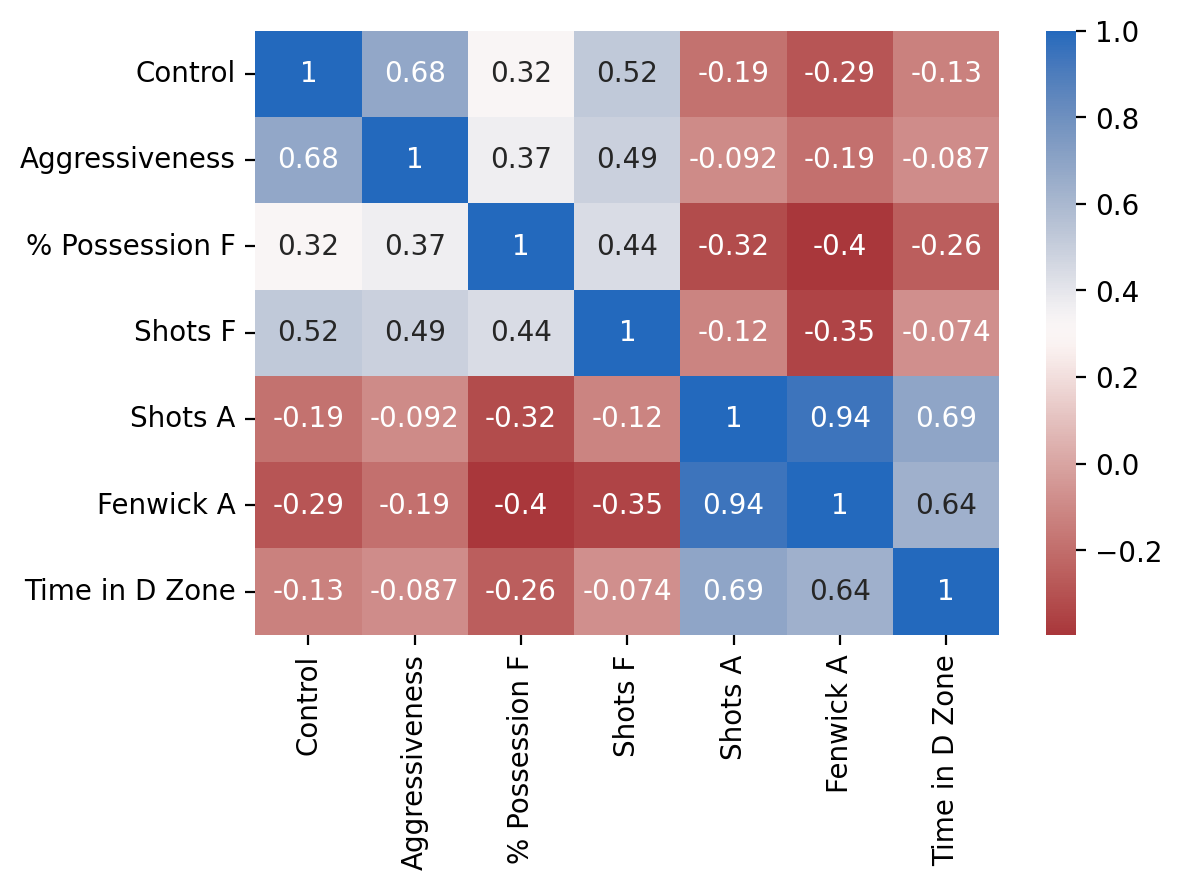

In [9]:
corr = pk_df.loc[:, 
                 (
                     'Control',
                     'Aggressiveness', 
                     '% Possession F',
                     'Shots F', 
                     'Shots A',
                     'Fenwick A',
                     'Time in D Zone',
                 )
                ].corr()
g = sns.heatmap(corr, annot=True, cmap='vlag_r')
plt.savefig('results/BDC_' + yr + '_Correlations.png')